## Step 0 - Libraries Importing

In [131]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline
warnings.filterwarnings("ignore")

## Step 1 -  Dataset Importing

In [132]:
df = pd.read_csv('flights.csv', low_memory=False)
airports = pd.read_csv("airports.csv")
airlines = pd.read_csv("airlines.csv")

df.shape

(5819079, 31)

In [133]:
# since the data exceeds 5.8M!, I will work only on January data, Which about half a million on its own :)
df = df[df['MONTH'] == 1]
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469963,2015,1,31,6,B6,839,N658JB,JFK,BQN,2359,2359.0,0.0,18.0,17.0,221.0,200.0,179.0,1576,416.0,3.0,440,419.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
469964,2015,1,31,6,DL,1887,N855NW,SEA,DTW,2359,2359.0,0.0,16.0,15.0,252.0,239.0,209.0,1927,644.0,14.0,711,658.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
469965,2015,1,31,6,F9,300,N218FR,DEN,TPA,2359,2.0,3.0,35.0,37.0,192.0,212.0,168.0,1506,525.0,9.0,511,534.0,23.0,0,0,NaN,21.0,0.0,2.0,0.0,0.0
469966,2015,1,31,6,F9,422,N954FR,DEN,ATL,2359,2359.0,0.0,40.0,39.0,162.0,191.0,141.0,1199,500.0,10.0,441,510.0,29.0,0,0,NaN,29.0,0.0,0.0,0.0,0.0


In [134]:
df.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.041425,0.006201,-0.013528,-0.025984,-0.157051,-0.033699,-0.023723,-0.013462,-0.040000,-0.030832,-0.017250,0.003072,-0.066519,-0.002427,0.005811,-0.175493,-0.006280,0.033091,-0.009744,-0.001016,-0.002448,-0.078772,-0.024105
DAY_OF_WEEK,NaN,NaN,-0.041425,1.000000,0.016484,0.014203,0.014525,0.017254,-0.024878,0.012613,0.018489,0.023139,0.027161,0.021530,0.005392,-0.000838,0.009466,0.004493,0.013549,-0.000263,-0.072735,-0.022558,0.010575,0.012757,0.019949,-0.020101
FLIGHT_NUMBER,NaN,NaN,0.006201,0.016484,1.000000,-0.004432,0.002301,0.024760,0.048348,0.008530,-0.333076,-0.319999,-0.335150,-0.349912,-0.017685,0.001791,-0.027194,-0.013706,0.053137,0.009583,0.031115,-0.010526,-0.010328,0.013536,0.066484,0.000673
SCHEDULED_DEPARTURE,NaN,NaN,-0.013528,0.014203,-0.004432,1.000000,0.972731,0.098088,-0.080555,0.949805,-0.033439,-0.037701,-0.023783,-0.013852,0.706850,-0.048600,0.767971,0.683153,0.084720,-0.006217,-0.001130,-0.100110,-0.004387,-0.076017,0.156465,-0.035452
DEPARTURE_TIME,NaN,NaN,-0.025984,0.014525,0.002301,0.972731,1.000000,0.177239,-0.071602,0.974883,-0.036701,-0.040080,-0.027934,-0.019962,0.720638,-0.042644,0.768751,0.696224,0.159634,-0.003767,0.006605,-0.087808,-0.000091,-0.005386,0.229827,-0.025667
DEPARTURE_DELAY,NaN,NaN,-0.157051,0.017254,0.024760,0.098088,0.177239,1.000000,0.068726,0.169670,0.017144,0.024937,0.013282,0.013871,0.077309,0.036644,0.093983,0.069519,0.938116,0.025435,0.027349,0.055810,0.015349,0.631361,0.567205,0.234879
TAXI_OUT,NaN,NaN,-0.033699,-0.024878,0.048348,-0.080555,-0.071602,0.068726,1.000000,-0.043909,0.103449,0.204610,0.076547,0.060710,-0.045088,0.009473,-0.058088,-0.046359,0.249025,0.009891,0.006474,0.390677,-0.008647,-0.057410,-0.137060,0.089112
WHEELS_OFF,NaN,NaN,-0.023723,0.012613,0.008530,0.949805,0.974883,0.169670,-0.043909,1.000000,-0.043071,-0.043933,-0.035677,-0.030754,0.737800,-0.041330,0.778212,0.713366,0.157566,-0.003658,0.005989,-0.074555,-0.007305,-0.013736,0.208127,-0.031862


## Step 2 - Data Cleaning 

In [135]:
#We already have the dates by Day, Month and Year, Why not combine them together?
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])
df['DATE']

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
469963   2015-01-31
469964   2015-01-31
469965   2015-01-31
469966   2015-01-31
469967   2015-01-31
Name: DATE, Length: 469968, dtype: datetime64[ns]

In [136]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
    
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
    
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)


In [137]:
df['SCHEDULED_DEPARTURE'] = create_flight_time(df, 'SCHEDULED_DEPARTURE')
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(format_heure)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(format_heure)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(format_heure)

df.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME','ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01 00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01 00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01 00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01 00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01 00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0
5,2015-01-01 00:25:00,06:02:00,00:20:00,06:10:00,-5.0,8.0


In [138]:
# I will remove the columns that I won't use
unused_columns = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 'MONTH',
                       'DAY','DAY_OF_WEEK','DATE', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED','CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
df.drop(unused_columns, axis = 1, inplace = True)
df = df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]
df[:5]

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
0,AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,04:30:00,04:08:00,-22.0,205.0,194.0
1,AA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,07:50:00,07:41:00,-9.0,280.0,279.0
2,US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,08:06:00,08:11:00,5.0,286.0,293.0
3,AA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,08:05:00,07:56:00,-9.0,285.0,281.0
4,AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,03:20:00,02:59:00,-21.0,235.0,215.0


In [139]:
# Here I will deal with the missing data

missing = df.isnull().sum(axis=0).reset_index()
missing.columns = ['variable', 'missing']
missing['filling percantage']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing.sort_values('filling percantage').reset_index(drop = True)

,variable,missing,filling percantage
0,ARRIVAL_DELAY,12955,97.243429
1,ELAPSED_TIME,12955,97.243429
2,ARRIVAL_TIME,12271,97.388971
3,DEPARTURE_TIME,11657,97.519618
4,DEPARTURE_DELAY,11657,97.519618
5,AIRLINE,0,100.000000
6,ORIGIN_AIRPORT,0,100.000000
7,DESTINATION_AIRPORT,0,100.000000
8,SCHEDULED_DEPARTURE,0,100.000000
9,SCHEDULED_ARRIVAL,0,100.000000


In [140]:
df = df.dropna()
df.describe()

,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
count,457013.000000,457013.000000,457013.000000,457013.000000
mean,9.689711,5.813583,140.367845,136.491717
std,36.419880,39.413501,74.846149,73.616901
min,-48.000000,-82.000000,23.000000,17.000000
25%,-5.000000,-13.000000,85.000000,82.000000
50%,-2.000000,-4.000000,122.000000,119.000000
75%,9.000000,10.000000,173.000000,169.000000
max,1988.000000,1971.000000,718.000000,724.000000


## Step 3 - Exploratory Data Analysis

In [141]:
companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [142]:
#function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

# Creation of a dataframe with statitical infos on each airline:
airline_stats = df['DEPARTURE_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
airline_stats = airline_stats.sort_values('count')
airline_stats

,min,max,count,mean
AIRLINE,,,,
VX,-20.0,397.0,4647.0,6.896277
HA,-26.0,1003.0,6408.0,1.311954
F9,-32.0,696.0,6735.0,17.910765
NK,-28.0,557.0,8632.0,13.073100
AS,-47.0,444.0,13151.0,3.072086
B6,-27.0,500.0,20482.0,9.988331
MQ,-29.0,780.0,27568.0,15.995865
US,-26.0,638.0,32478.0,5.175011
UA,-40.0,886.0,37363.0,13.885555


### Delays per Airline

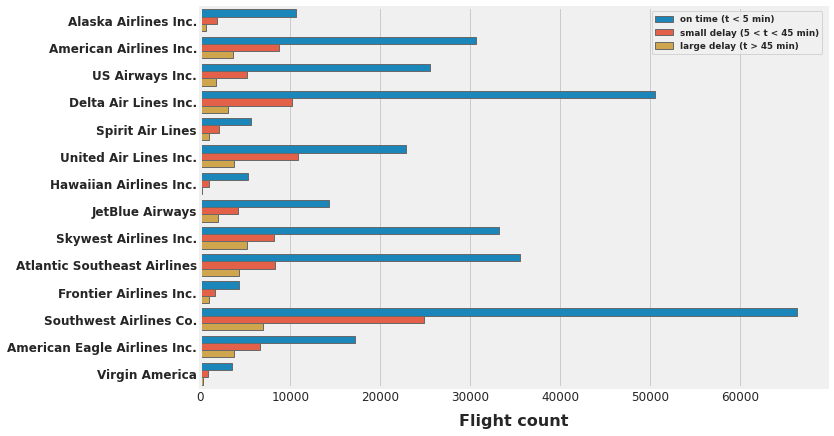

In [143]:
# define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)

# We replace the abbreviations by the full names of the companies and set the labels
labels = [companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


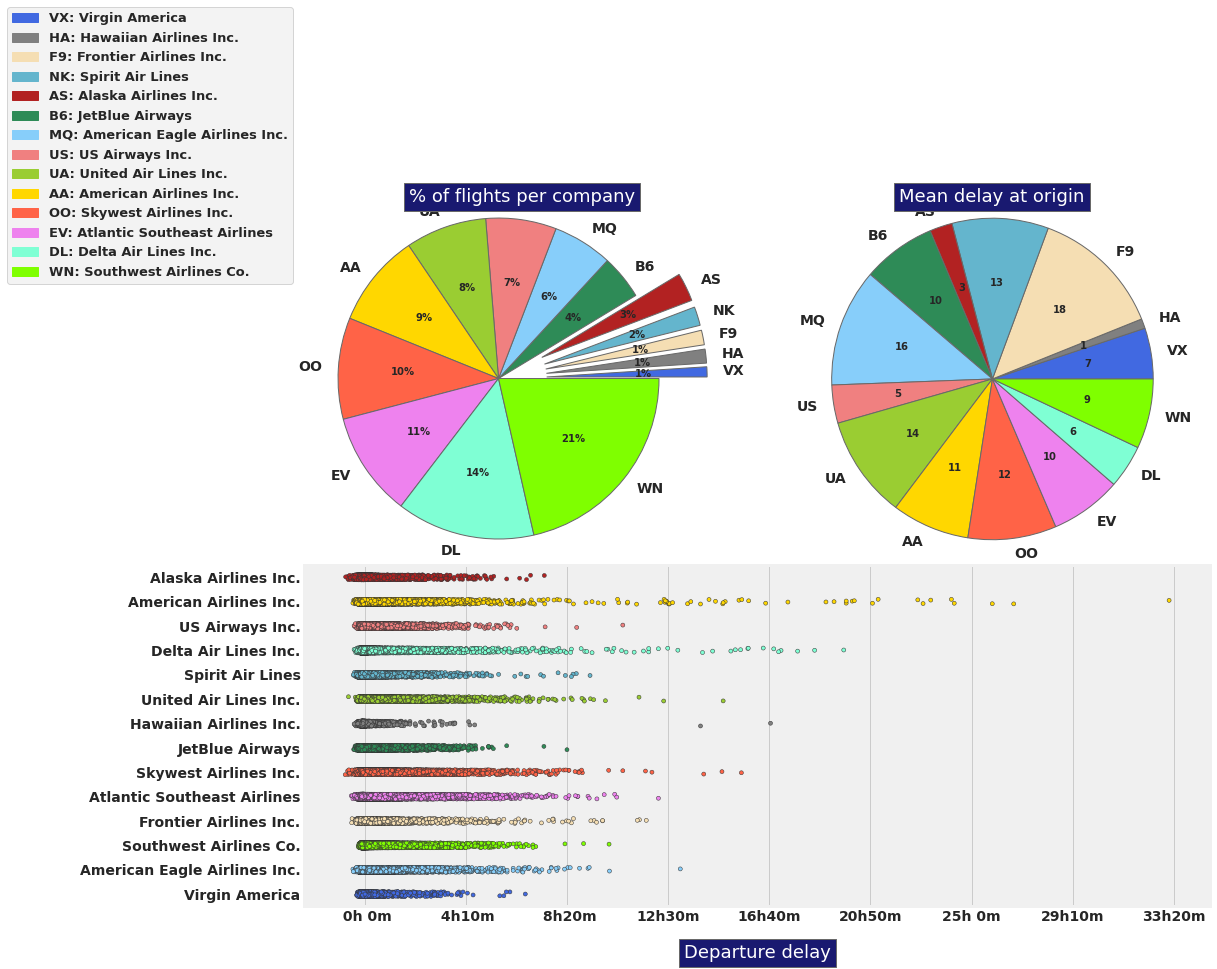

In [144]:
import matplotlib.patches as mpatches

# I extract a subset of columns and redefine the airlines labeling 
df2 = df.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
df2['AIRLINE'] = df2['AIRLINE'].replace(companies)

colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 

# Pie chart nº1: nb of flights

labels = [s for s in  airline_stats.index]
sizes  = airline_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)

# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = airline_stats.index[i] + ': ' + abbr_companies[airline_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)

# Pie chart nº2: mean delay at departure

sizes  = airline_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)

# striplot with all the values reported for the delays

# I redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3) 

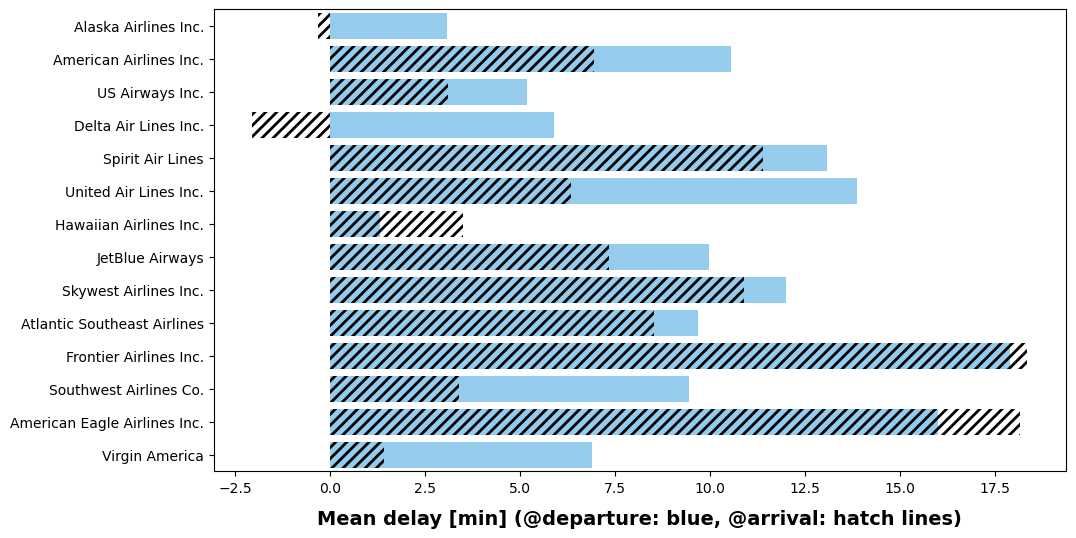

In [145]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=df, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=df, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (@departure: blue, @arrival: hatch lines)',
           fontsize=14, weight = 'bold', labelpad=10);

## We can see that delays at arrival are generally lower than at departure. This indicates that airlines adjust their flight speed in order to reduce the delays at arrival

In [146]:
print("Number of airports in the dataset: {}".format(len(df['ORIGIN_AIRPORT'].unique())))

Number of airports in the dataset: 312


In [147]:
airport_mean_delays = pd.DataFrame(pd.Series(df['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    df1 = df[df['AIRLINE'] == carrier]
    test = df1['DEPARTURE_DELAY'].groupby(df['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

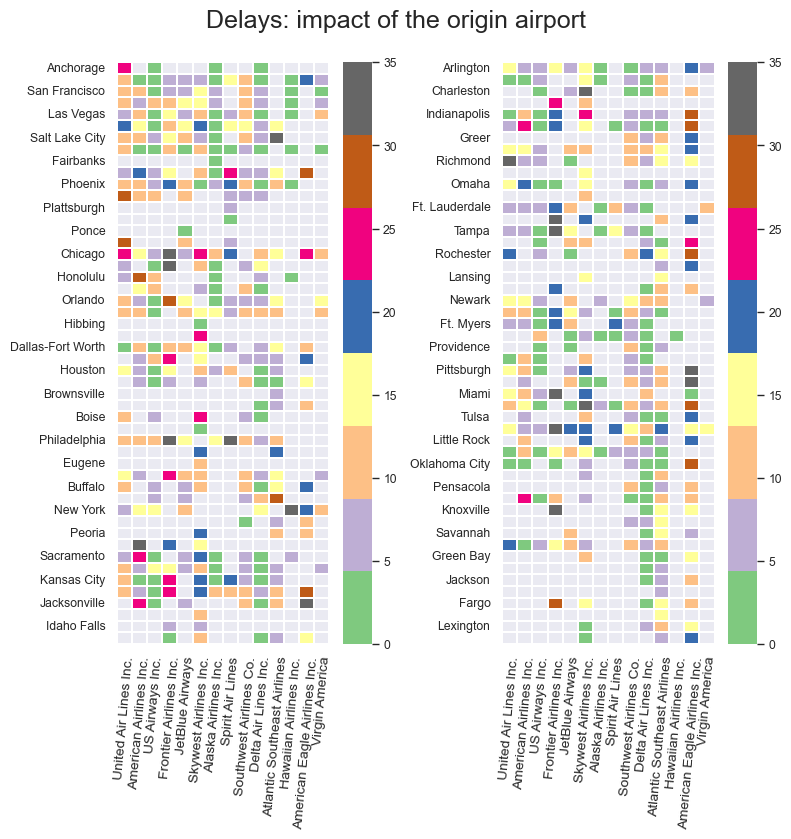

In [148]:
identify_airport = airports.set_index('IATA_CODE')['CITY'].to_dict()

sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()


## Step 4 - Modelling
### I will build a model for a single airline against all airports, The model will use the data for the previous 25 days to predict the next five days filghts.

In [149]:
df_train = df[df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 25)]
df_test  = df[df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 25)]
df = df_train

In [150]:
carrier = 'AA'
check_airports = df[(df['AIRLINE'] == carrier)]['DEPARTURE_DELAY'].groupby(
                         df['ORIGIN_AIRPORT']).apply(get_stats).unstack()
check_airports.sort_values('count', ascending = False, inplace = True)
check_airports

,min,max,count,mean
ORIGIN_AIRPORT,,,,
DFW,-16.0,753.0,9509.0,14.409507
MIA,-13.0,649.0,3326.0,13.636200
ORD,-13.0,420.0,2978.0,16.642713
LAX,-15.0,254.0,2035.0,4.793612
JFK,-12.0,891.0,1055.0,15.542180
...,...,...,...,...
JAC,-19.0,72.0,28.0,-1.571429
GUC,-24.0,199.0,24.0,11.875000
SDF,-8.0,55.0,20.0,9.450000


In [151]:
def linear_regression(test2):
    test = test2[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)
    X = np.array(test['heure_depart_min'])
    Y = np.array(test['mean'])
    X = X.reshape(len(X),1)
    Y = Y.reshape(len(Y),1)
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    result = regr.predict(X)
    return X, Y, result


In [152]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)
print("mean_squared_error =", metrics.mean_squared_error(predictions, Y))

mean_squared_error = 54.18170226377572


## Step 5 - Conclusion

We used the 25 previous days to predict the next 6, and we got 54% accuracy, It's not that good but because of high uncerationy and many variables affect the delay time we got that percentage.